# Introduction to Climatrix and Basic Operations

This notebook demonstrates basic operations using the climatrix library, including creating a BaseClimatrixDataset object, accessing domain and axis information, and performing basic arithmetic operations.

In [ ]:
import climatrix as cm
import xarray as xr
import numpy as np

### ⬇️ Download DATASET first

1. You can either download first ERA5-Land directly from [CDS](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview) 
2. or use the `climatrix` CLI 

```bash
cm dataset config cds
```

and then

```bash
cm dataset download era5-land --year 2015 --month 10 --day 10 --hour 14 --target ./era5-land.nc
```

## Loading a Dataset

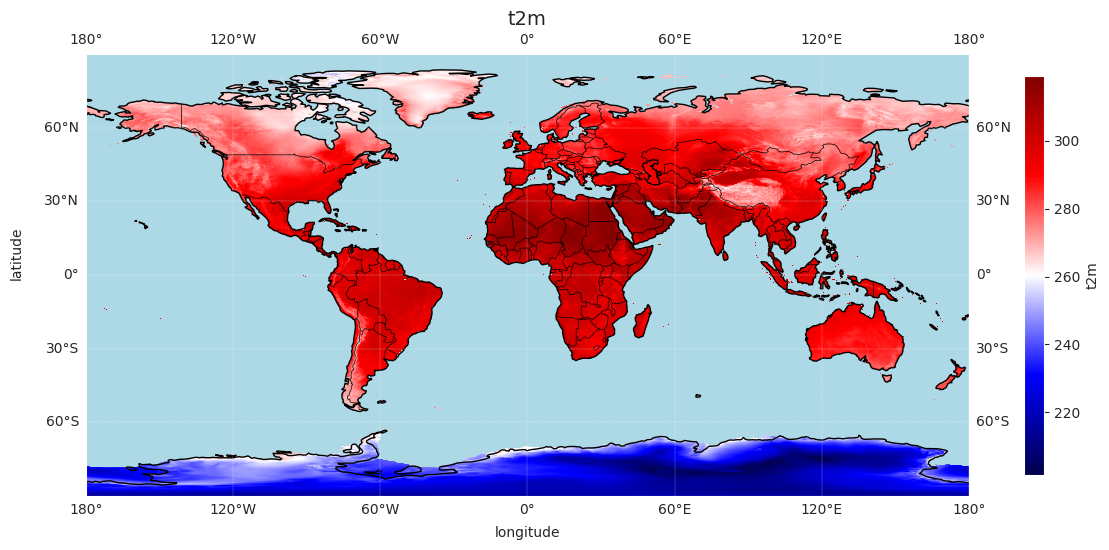

<GeoAxes: title={'center': 't2m'}>

In [6]:
xr_dset = xr.open_dataset("era5-land.nc")
dset = xr_dset.cm
dset.plot()

### Information about the `Domain`

In [7]:
domain = dset.domain

print(f"is the domain sparse? {domain.is_sparse}")
print(f"is the domain dynamic? {domain.is_dynamic}")

is the domain sparse? False
is the domain dynamic? False


### Accessing Axes
Individual axes (such as latitude, longitude, time) can be accessed through the properties of the domain object.

In [8]:
print(f"All axes types available in the domain: {domain.all_axes_types}")

lat_axis = domain.latitude
lon_axis = domain.longitude
time_axis = domain.time

print(f"\nCoordinate name: {lat_axis.name}")
print(f"Values: {lat_axis.values}")

print(f"\nCoordinate name: {lon_axis.name}")
print(f"Values: {lon_axis.values}")

print(f"\nCoordinate name: {time_axis.name}")
print(f"Values: {time_axis.values}")

All axes types available in the domain: [<AxisType.TIME: 'time'>, <AxisType.LATITUDE: 'latitude'>, <AxisType.LONGITUDE: 'longitude'>]

Coordinate name: latitude
Values: [ 90.   89.9  89.8 ... -89.8 -89.9 -90. ]

Coordinate name: longitude
Values: [0.000e+00 1.000e-01 2.000e-01 ... 3.597e+02 3.598e+02 3.599e+02]

Coordinate name: valid_time
Values: ['2025-05-17T14:00:00.000000000']


### Axis Size and Axis Presence Check

In [9]:
from climatrix.dataset.axis import AxisType

print(f"Latitude axis size: {domain.get_size(AxisType.LATITUDE)}")
print(f"Longitude axis size: {domain.get_size('longitude')}")
print(f"Time axis size: {domain.get_size(AxisType.TIME)}")

print(f"\nDoes the domain have a time axis? {domain.has_axis(AxisType.POINT)}")
print(f"Does the domain have a vertical axis? {domain.has_axis(AxisType.VERTICAL)}")

Latitude axis size: 1801
Longitude axis size: 3600
Time axis size: 1

Does the domain have a time axis? False
Does the domain have a vertical axis? False


### Domain shape and size

In [10]:
print(f"Domain shape (dimensions): {domain.shape}")
print(f"Total domain size (number of data points): {domain.size}")

Domain shape (dimensions): (1801, 3600)
Total domain size (number of data points): 6483600


### Arithmetic Operations
BaseClimatrixDataset supports basic arithmetic operations.

In [11]:
print(f"Orginal dataset:\n{dset.da}")

cm_plus_10 = dset + 10
print(f"\nDataset after adding 10:\n{cm_plus_10.da}")

cm_multiplied = dset * 2
print(f"\nDataset after multiplying by 2:\n{cm_multiplied.da}")

Orginal dataset:
<xarray.DataArray 't2m' (latitude: 1801, longitude: 3600)> Size: 26MB
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [216.11235, 216.1143 , 216.1143 , ..., 216.10844, 216.1104 , 216.11235],
       [216.09477, 216.09477, 216.09477, ..., 216.09087, 216.09087, 216.09282],
       [214.56938, 214.56938, 214.56938, ..., 214.56938, 214.56938, 214.56938]],
      shape=(1801, 3600), dtype=float32)
Coordinates:
    valid_time  datetime64[ns] 8B 2025-05-17T14:00:00
  * latitude    (latitude) float64 14kB 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:             

## Creating a Domain Using `Domain.from_lat_lon`

In [12]:
from climatrix.dataset.domain import Domain
from climatrix.dataset.axis import AxisType

dense_domain_from_func = Domain.from_lat_lon(
    lat=slice(40, 50, 1),
    lon=slice(-100, -90, 1),
    kind='dense'
)
print("Dense domain created using `from_lat_lon`:")
print(f"Type: {type(dense_domain_from_func)}")
print(f"Latitudes: {dense_domain_from_func.latitude.values}")
print(f"Longitudes: {dense_domain_from_func.longitude.values}")
print(f"Is sparse? {dense_domain_from_func.is_sparse}")

sparse_lat = np.array([40.5, 42.1, 45.3])
sparse_lon = np.array([-95.2, -93.0, -90.5])
sparse_domain_from_func = Domain.from_lat_lon(
    lat=sparse_lat,
    lon=sparse_lon,
    kind='sparse'
)
print("\nSparse domain created using `from_lat_lon`:")
print(f"Type: {type(sparse_domain_from_func)}")
print(f"Latitudes: {sparse_domain_from_func.latitude.values}")
print(f"Longitudes: {sparse_domain_from_func.longitude.values}")
print(f"Is sparse? {sparse_domain_from_func.is_sparse}")
print(f"Size of 'point' axis: {sparse_domain_from_func.get_size(AxisType.POINT)}")


Dense domain created using `from_lat_lon`:
Type: <class 'climatrix.dataset.domain.DenseDomain'>
Latitudes: [40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
Longitudes: [-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.]
Is sparse? False

Sparse domain created using `from_lat_lon`:
Type: <class 'climatrix.dataset.domain.SparseDomain'>
Latitudes: [40.5 42.1 45.3]
Longitudes: [-95.2 -93.  -90.5]
Is sparse? True
Size of 'point' axis: 3
